# Homework 3.1

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

#### Author: JasonLLLL ---> Jingsheng Lyu

##  **Install detectron2**

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Question 3.1.1:
### 利用detectron2提供的Faster R-CNN_R50-FPN_1x模型和RetinaNet_R50_1x模型测试
https://github.com/rbgirshick/py-faster-rcnn/tree/master/data/demo 里面的5张图片,
对比两者的检测结果

## 3.1.1.1. Using Faster R-CNN_R50-FPN_1x Model

###### 3.1.1.1.1. image 000456.jpg with Faster R-CNN_R50-FPN_1x model

/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


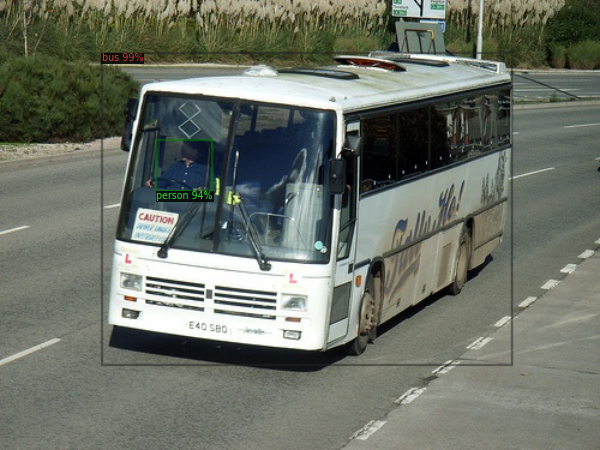

In [ ]:
# read the image1 - 000456.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/000456.jpg -q -O input000456.jpg
im000456 = cv2.imread("./input000456.jpg")
#cv2_imshow(im000456)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im000456)

# show the test result
v = Visualizer(im000456[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.1.2. image 000542.jpg with Faster R-CNN_R50-FPN_1x model

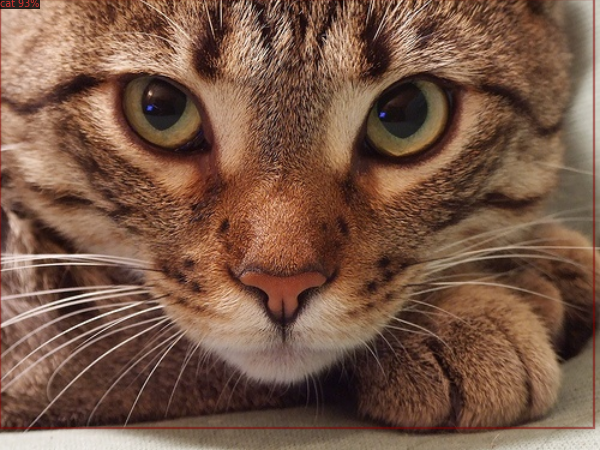

In [ ]:
# read the image1 - 000542.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/000542.jpg -q -O input000542.jpg
im000542 = cv2.imread("./input000542.jpg")
#cv2_imshow(im000542)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im000542)

# show the test result
v = Visualizer(im000542[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.1.3. image 001150.jpg with Faster R-CNN_R50-FPN_1x model

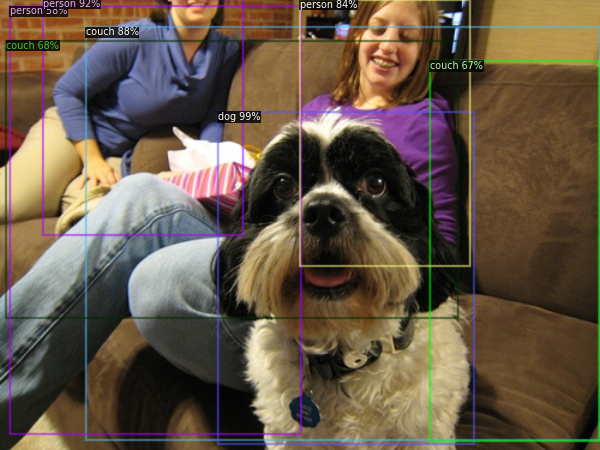

In [ ]:
# read the image1 - 001150.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/001150.jpg -q -O input001150.jpg
im001150 = cv2.imread("./input001150.jpg")
#cv2_imshow(im001150)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im001150)

# show the test result
v = Visualizer(im001150[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.1.4. image 001763.jpg with Faster R-CNN_R50-FPN_1x model

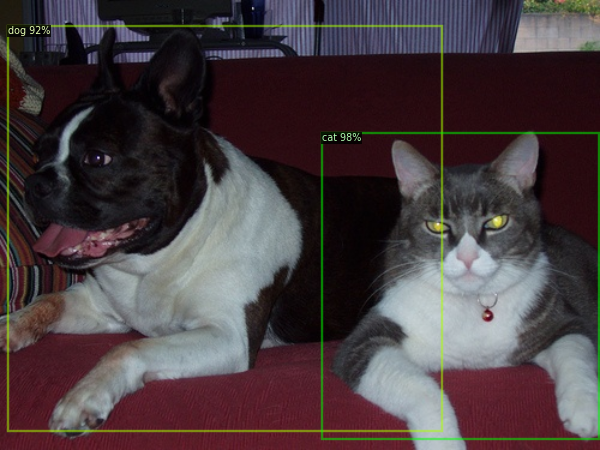

In [ ]:
# read the image1 - 001763.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/001763.jpg -q -O input001763.jpg
im001763 = cv2.imread("./input001763.jpg")
#cv2_imshow(im001763)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im001763)

# show the test result
v = Visualizer(im001763[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.1.5. image 004545.jpg with Faster R-CNN_R50-FPN_1x model

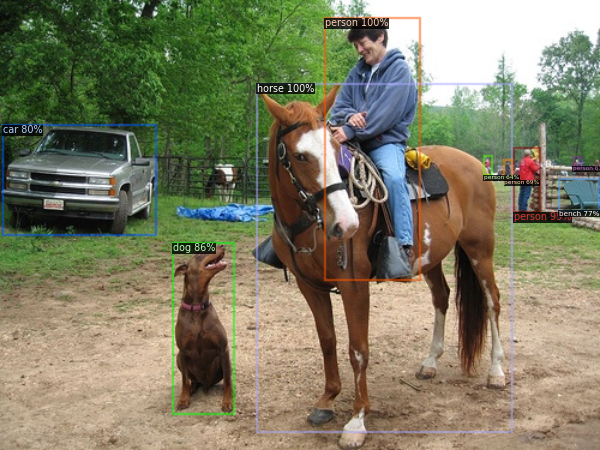

In [ ]:
# read the image1 - 004545.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/004545.jpg -q -O input004545.jpg
im004545 = cv2.imread("./input004545.jpg")
#cv2_imshow(im004545)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im004545)

# show the test result
v = Visualizer(im004545[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## 3.1.1.2 Using RetinaNet_R50_1x Model

###### 3.1.1.2.1 image 000456.jpg with RetinaNet_R50_1x Model

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


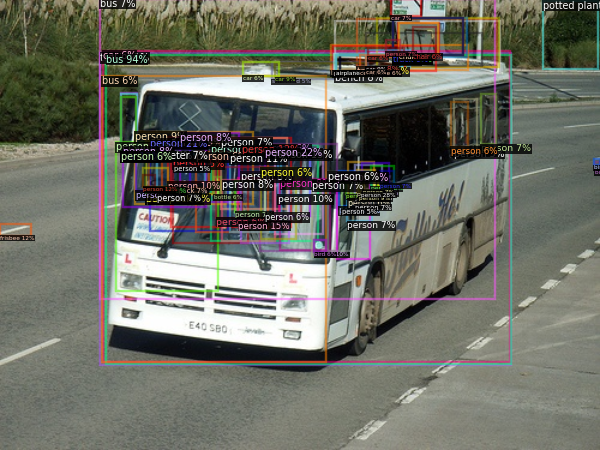

In [ ]:
# read the image1 - 000456.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/000456.jpg -q -O input000456.jpg
im000456 = cv2.imread("./input000456.jpg")
#cv2_imshow(im000456)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im000456)

# show the test result
v = Visualizer(im000456[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.2.2. image 000542.jpg with RetinaNet_R50_1x Model

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


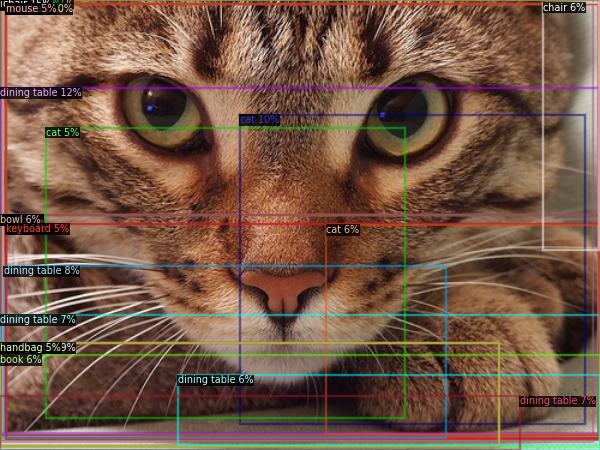

In [ ]:
# read the image1 - 000542.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/000542.jpg -q -O input000542.jpg
im000542 = cv2.imread("./input000542.jpg")
#cv2_imshow(im000542)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im000542)

# show the test result
v = Visualizer(im000542[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.2.3. image 001150.jpg with RetinaNet_R50_1x Model

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


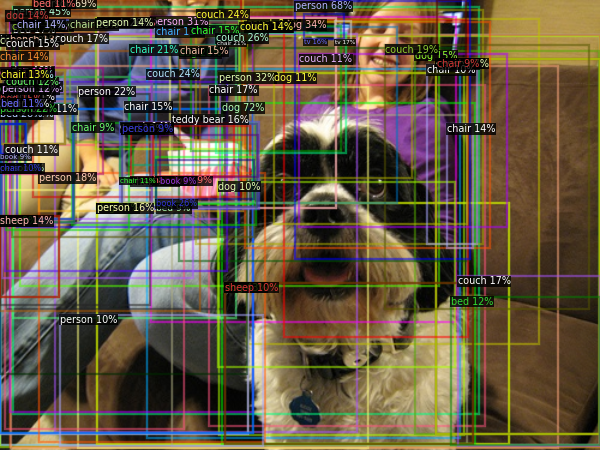

In [ ]:
# read the image1 - 001150.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/001150.jpg -q -O input001150.jpg
im001150 = cv2.imread("./input001150.jpg")
#cv2_imshow(im001150)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im001150)

# show the test result
v = Visualizer(im001150[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.2.4. image 001763.jpg with RetinaNet_R50_1x Model

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


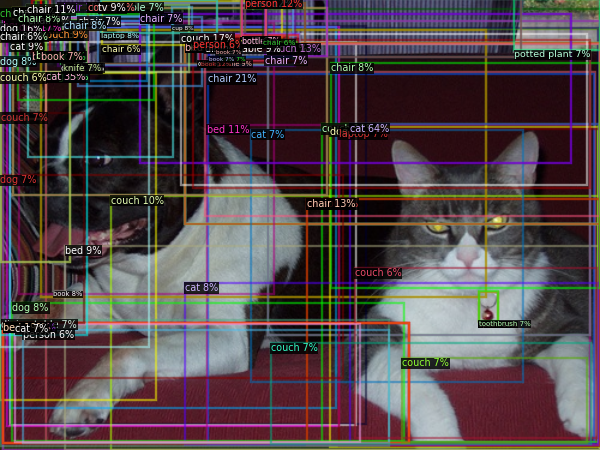

In [ ]:
# read the image1 - 001763.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/001763.jpg -q -O input001763.jpg
im001763 = cv2.imread("./input001763.jpg")
#cv2_imshow(im001763)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im001763)

# show the test result
v = Visualizer(im001763[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

###### 3.1.1.2.5. image 004545.jpg with RetinaNet_R50_1x Model

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


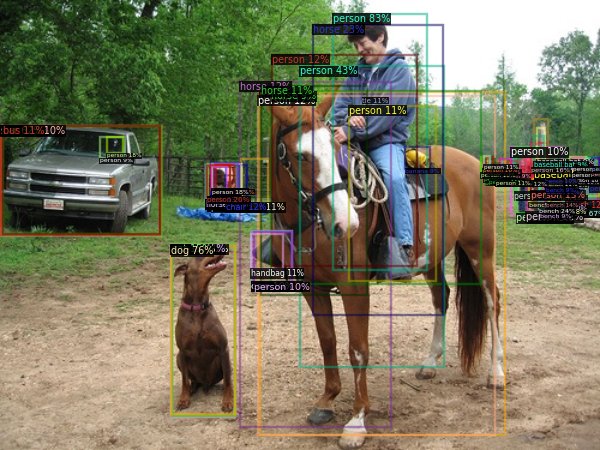

In [ ]:
# read the image1 - 004545.jpg
!wget https://raw.githubusercontent.com/rbgirshick/py-faster-rcnn/master/data/demo/004545.jpg -q -O input004545.jpg
im004545 = cv2.imread("./input004545.jpg")
#cv2_imshow(im004545)

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im004545)

# show the test result
v = Visualizer(im004545[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Question 3.1.2:
### 利用detectron2提供的Faster R-CNN_R50-FPN_1x模型和RetinaNet_R50_1x模型在MS
COCO验证集上进行评测,得到官方给出的精度

In [ ]:
#!wget http://images.cocodataset.org/zips/test2017.zip
#!wget http://images.cocodataset.org/annotations/image_info_test2017.zip

In [ ]:
#!unzip test2017.zip > /dev/null 
#!unzip image_info_test2017.zip > /dev/null

In [ ]:
# Register the coco dataset to detectron2
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_test", {}, "/content/annotations/image_info_test2017.json", "/content/test2017")

## Train!

Now, let's fine-tune a COCO-pretrained Faster R-CNN model on the test dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU.

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
#cfg.DATASETS.TRAIN = ("my_dataset_test",)
cfg.DATASETS.TEST = ("my_dataset_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 

[08/06 21:14:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

FileNotFoundError: ignored

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))
# another equivalent way is to use trainer.test

WARNING [08/06 21:15:01 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/06 21:15:01 d2.data.datasets.coco]: Loaded 40670 images in COCO format from /content/annotations/image_info_test2017.json
[08/06 21:15:02 d2.data.build]: Distribution of instances among all 80 categories:
|   category    | #instances   |   category   | #instances   |   category    | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:-------------:|:-------------|
|    person     | 0            |   bicycle    | 0            |      car      | 0            |
|  motorcycle   | 0            |   airplane   | 0            |      bus      | 0            |
|     train     | 0            |    truck     | 0            |     boat      | 0            |
| traffic light | 0            | fire hydrant | 0            |   stop sign   | 0            |
| parking meter | 0            |    bench     | 0            |     bird      | 0         

TypeError: ignored